In [1]:
import tensorflow as tf
import os
from matplotlib import pyplot as plt
from matplotlib.image import imread
import pathlib
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.layers import Conv2D, Flatten, Dense,  MaxPool2D, BatchNormalization, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16

from tensorflow.keras.applications.efficientnet import EfficientNetB7
from tensorflow.keras.applications.nasnet import NASNetMobile
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet import ResNet101

In [8]:

img_width=256; img_height=256
batch_size=32

TRAINING_DIR = 'C:\\Users\\namra\\OneDrive\\Desktop\\dataset\\dataset_updated\\training_set'
VALIDATION_DIR = 'C:\\Users\\namra\\OneDrive\\Desktop\\dataset\\dataset_updated\\validation_set'

train_datagen = ImageDataGenerator(rescale = 1/255.0,
                                   rotation_range=30,
                                   zoom_range=0.4,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))


validation_datagen = ImageDataGenerator(rescale = 1/255.0)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width)
                                                             )

Found 7676 images belonging to 5 classes.
Found 850 images belonging to 5 classes.


In [14]:

base_model=tf.keras.applications.InceptionV3(include_top=False, weights='imagenet')
base_model.summary()
x=base_model.output
print("Output Shape of the model = {}".format(x))
x=GlobalAveragePooling2D()(x)


x=Dense(1024,activation='relu')(x)
x =Dropout(0.5)(x)

predictions=Dense(5,activation='softmax')(x)

model=Model(inputs=base_model.input,outputs=predictions)


87924736/87910968 [==============================] - 3s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation_188 (Activation)     (None, None, None, 3 0           batch_normalization[0][0]        
______________________

In [16]:
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
#best_model_file = './CNN_aug_best_weights.h5'
#best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

for layer in base_model.layers:
    layer.trainable=False
    

model.compile(optimizer='Adam', 
              loss='categorical_crossentropy', 
             metrics =['accuracy'])


history = model.fit(train_generator,
                              epochs=10,
                              verbose=1,
                              validation_data=validation_generator
                              #callbacks = [best_model]
                              )
#model.save('/content/drive/MyDrive/MTP/model_nasnet.h5')

Epoch 1/10
240/240 [==============================] - 446s 2s/step - loss: 0.6202 - accuracy: 0.7884 - val_loss: 0.3562 - val_accuracy: 0.8706
Epoch 2/10
240/240 [==============================] - 333s 1s/step - loss: 0.4032 - accuracy: 0.8478 - val_loss: 0.3668 - val_accuracy: 0.8671
Epoch 3/10
240/240 [==============================] - 335s 1s/step - loss: 0.3755 - accuracy: 0.8598 - val_loss: 0.3148 - val_accuracy: 0.8800
Epoch 4/10
240/240 [==============================] - 326s 1s/step - loss: 0.3340 - accuracy: 0.8731 - val_loss: 0.3051 - val_accuracy: 0.8859
Epoch 5/10
240/240 [==============================] - 331s 1s/step - loss: 0.3156 - accuracy: 0.8787 - val_loss: 0.2870 - val_accuracy: 0.8953
Epoch 6/10
240/240 [==============================] - 324s 1s/step - loss: 0.3204 - accuracy: 0.8782 - val_loss: 0.3507 - val_accuracy: 0.8718
Epoch 7/10
240/240 [==============================] - 312s 1s/step - loss: 0.3136 - accuracy: 0.8801 - val_loss: 0.2777 - val_accuracy: 0.8976

In [17]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']


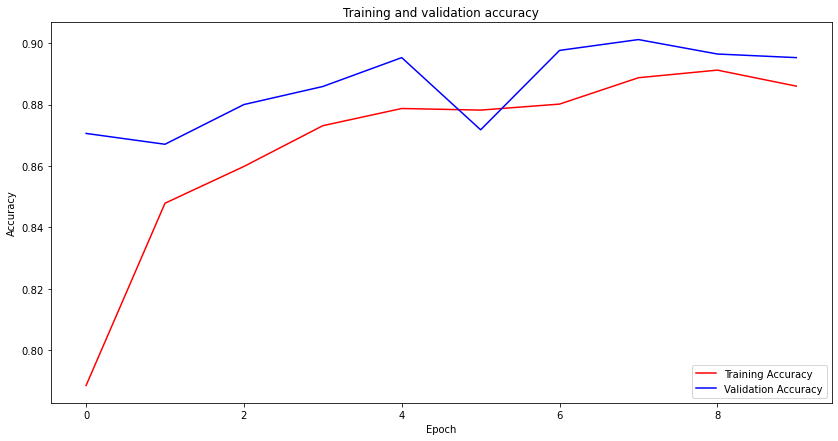

In [18]:
epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
#plt.show()
plt.savefig('accuracy_nesnet.png')

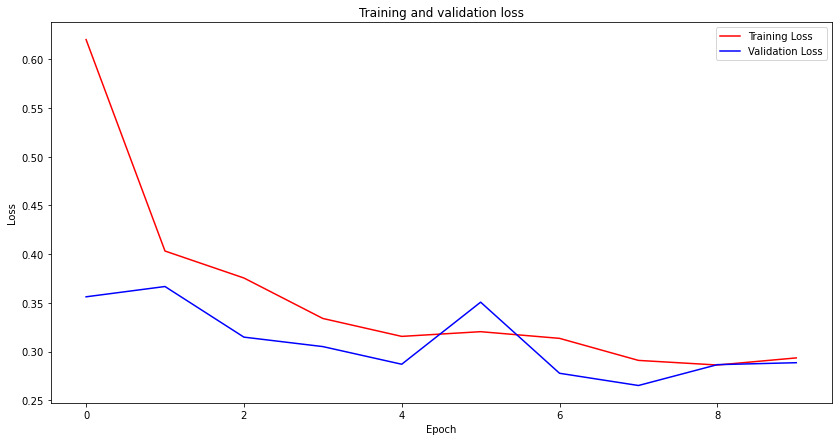

In [19]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.savefig('loss_nesnet.png')

In [21]:
base_model= ResNet101(include_top=False, weights='imagenet')
base_model.summary()
x=base_model.output
print("Output Shape of the model = {}".format(x))
x=GlobalAveragePooling2D()(x)


x=Dense(1024,activation='relu')(x)
x =Dropout(0.5)(x)

predictions=Dense(5,activation='softmax')(x)

model=Model(inputs=base_model.input,outputs=predictions)


171458560/171446536 [==============================] - 8s 0us/step
Model: "resnet101"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
_______________________

In [23]:
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
#best_model_file = './CNN_aug_best_weights.h5'
#best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

for layer in base_model.layers:
    layer.trainable=False
    

model.compile(optimizer='Adam', 
              loss='categorical_crossentropy', 
             metrics =['accuracy'])


history = model.fit(train_generator,
                              epochs=15,
                              verbose=1,
                              validation_data=validation_generator
                              #callbacks = [best_model]
                              )

Epoch 1/15
240/240 [==============================] - 1101s 5s/step - loss: 1.3978 - accuracy: 0.4349 - val_loss: 1.1929 - val_accuracy: 0.5588
Epoch 2/15
240/240 [==============================] - 1103s 5s/step - loss: 1.2339 - accuracy: 0.5279 - val_loss: 1.0899 - val_accuracy: 0.5871
Epoch 3/15
240/240 [==============================] - 1104s 5s/step - loss: 1.1914 - accuracy: 0.5444 - val_loss: 1.1034 - val_accuracy: 0.6000
Epoch 4/15
240/240 [==============================] - 1128s 5s/step - loss: 1.1704 - accuracy: 0.5576 - val_loss: 1.0326 - val_accuracy: 0.6176
Epoch 5/15
240/240 [==============================] - 1112s 5s/step - loss: 1.1584 - accuracy: 0.5595 - val_loss: 1.0916 - val_accuracy: 0.5800
Epoch 6/15
240/240 [==============================] - 1143s 5s/step - loss: 1.1298 - accuracy: 0.5763 - val_loss: 1.0413 - val_accuracy: 0.6118
Epoch 7/15
240/240 [==============================] - 1170s 5s/step - loss: 1.1252 - accuracy: 0.5765 - val_loss: 1.0370 - val_accuracy:

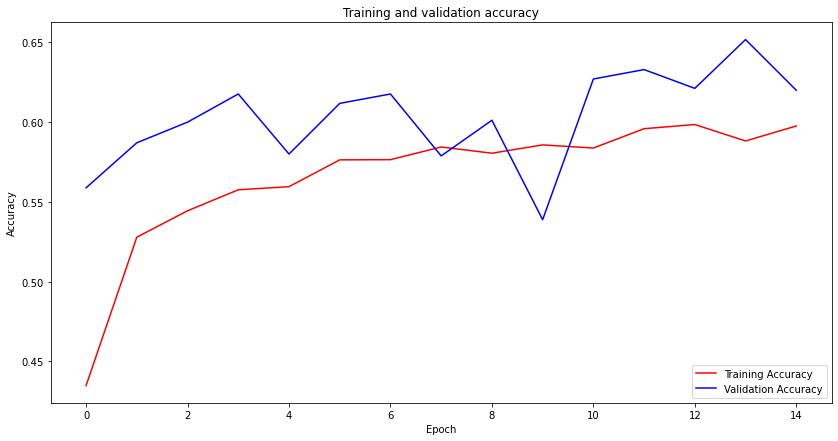

In [24]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')


In [5]:

base_model= NASNetMobile(include_top=False, weights='imagenet')
base_model.summary()
x=base_model.output
print("Output Shape of the model = {}".format(x))
x=GlobalAveragePooling2D()(x)


x=Dense(1024,activation='relu')(x)
x =Dropout(0.5)(x)

predictions=Dense(5,activation='softmax')(x)

model=Model(inputs=base_model.input,outputs=predictions)


Model: "NASNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
stem_conv1 (Conv2D)             (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
stem_bn1 (BatchNormalization)   (None, 111, 111, 32) 128         stem_conv1[0][0]                 
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 111, 111, 32) 0           stem_bn1[0][0]                   
_____________________________________________________________________________________________

normal_right4_12 (AveragePoolin (None, 7, 7, 176)    0           adjust_bn_12[0][0]               
__________________________________________________________________________________________________
separable_conv_2_bn_normal_left (None, 7, 7, 176)    704         separable_conv_2_normal_left5_12[
__________________________________________________________________________________________________
normal_add_1_12 (Add)           (None, 7, 7, 176)    0           separable_conv_2_bn_normal_left1_
                                                                 separable_conv_2_bn_normal_right1
__________________________________________________________________________________________________
normal_add_2_12 (Add)           (None, 7, 7, 176)    0           separable_conv_2_bn_normal_left2_
                                                                 separable_conv_2_bn_normal_right2
__________________________________________________________________________________________________
normal_add

In [11]:
#callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')

best_model_path = 'C:\\Users\\namra\\OneDrive\\Desktop\\dataset\\NASNet.h5'
best_model = ModelCheckpoint( filepath= best_model_path, verbose = 1, save_weights_only= True)

for layer in base_model.layers:
    layer.trainable=False
    

model.compile(optimizer='Adam', 
              loss='categorical_crossentropy', 
             metrics =['accuracy',tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])


history = model.fit(train_generator,
                              epochs=10,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks = [best_model]
                              )
model.save('C:\\Users\\namra\\OneDrive\\Desktop\\dataset\\model_nasnet.h5')

model.summary()

Epoch 1/10
240/240 [==============================] - 397s 2s/step - loss: 0.4489 - accuracy: 0.8336 - recall_1: 0.8114 - precision_1: 0.8580 - val_loss: 0.3123 - val_accuracy: 0.8812 - val_recall_1: 0.8647 - val_precision_1: 0.9029

Epoch 00001: saving model to C:\Users\namra\OneDrive\Desktop\dataset\NASNet.h5
Epoch 2/10
240/240 [==============================] - 345s 1s/step - loss: 0.3478 - accuracy: 0.8701 - recall_1: 0.8541 - precision_1: 0.8874 - val_loss: 0.2935 - val_accuracy: 0.9012 - val_recall_1: 0.8800 - val_precision_1: 0.9122

Epoch 00002: saving model to C:\Users\namra\OneDrive\Desktop\dataset\NASNet.h5
Epoch 3/10
240/240 [==============================] - 350s 1s/step - loss: 0.3188 - accuracy: 0.8803 - recall_1: 0.8674 - precision_1: 0.8965 - val_loss: 0.2769 - val_accuracy: 0.9012 - val_recall_1: 0.8894 - val_precision_1: 0.9076

Epoch 00003: saving model to C:\Users\namra\OneDrive\Desktop\dataset\NASNet.h5
Epoch 4/10
240/240 [==============================] - 345s 1s

C:\Users\namra\anaconda3\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
stem_conv1 (Conv2D)             (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
stem_bn1 (BatchNormalization)   (None, 111, 111, 32) 128         stem_conv1[0][0]                 
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 111, 111, 32) 0           stem_bn1[0][0]                   
____________________________________________________________________________________________

Total params: 5,357,209
Trainable params: 1,087,493
Non-trainable params: 4,269,716
__________________________________________________________________________________________________


In [8]:
! pip install pyyaml h5py 

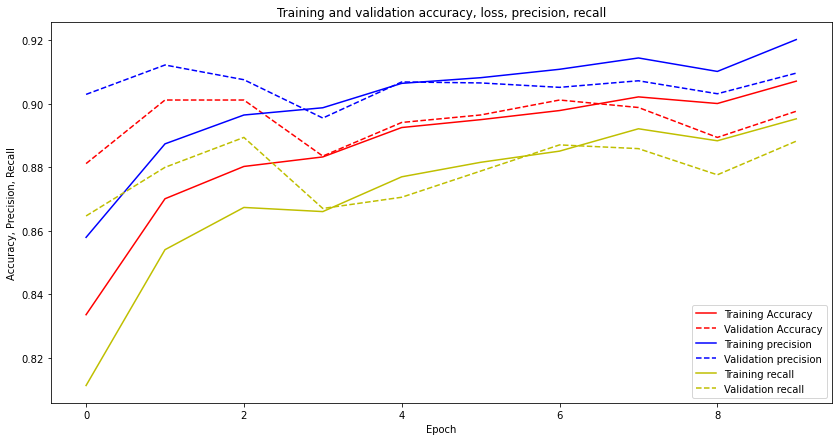

In [199]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
recall =history.history['recall_1']
val_recall =history.history['val_recall_1']
precision=history.history['precision_1']
val_precision=history.history['val_precision_1']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc,'--r',  label="Validation Accuracy")
#plt.plot(epochs, loss, 'g', label="Training loss")
#plt.plot(epochs, val_loss,'--g',  label="Validation loss")
plt.plot(epochs, precision, 'b', label="Training precision")
plt.plot(epochs, val_precision,'--b',  label="Validation precision")
plt.plot(epochs, recall, 'y', label="Training recall")
plt.plot(epochs, val_recall,'--y',  label="Validation recall")

plt.xlabel('Epoch')
plt.ylabel('Accuracy, Precision, Recall')
plt.title('Training and validation accuracy, loss, precision, recall')
plt.legend(loc='lower right')

Text(0, 0.5, 'epoch')

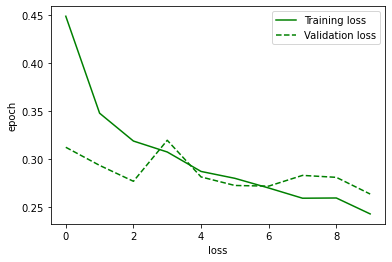

In [202]:
plt.plot(epochs, loss, 'g', label="Training loss")
plt.plot(epochs, val_loss,'--g',  label="Validation loss")
plt.legend()
plt.xlabel('loss')
plt.ylabel('epoch')

In [23]:
model.save_weights(best_model_path)

In [28]:
new_model =  tf.keras.models.load_model('C:\\Users\\namra\\OneDrive\\Desktop\\dataset\\model_nasnet.h5')

In [40]:
y_pred= new_model.predict(validation_generator)

In [126]:
y_pred_2 = []

4250

In [174]:
validation_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [30]:
new_model.evaluate(validation_generator)

27/27 [==============================] - 35s 1s/step - loss: 0.2636 - accuracy: 0.8976 - recall_1: 0.8882 - precision_1: 0.9096


[0.2636036276817322,
 0.8976470828056335,
 0.8882352709770203,
 0.9096385836601257]

In [43]:
from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import confusion_matrix

In [136]:
#confusion_matrix(arr, y_pred)

In [27]:
import joblib
filename = 'nasnet_model.sav'
joblib.dump(model, filename)

In [89]:
os.listdir('C://Users//namra//OneDrive//Desktop//dataset//dataset_updated/val_renamed//test')

['drawings_2202_mainfoto_05.jpg',
 'drawings_2328_mainfoto_05.jpg',
 'drawings_3399_mainfoto_05.jpg',
 'drawings_3429_mainfoto_05.jpg',
 'drawings_3460_mainfoto_05.jpg',
 'drawings_download (22).jpeg',
 'drawings_download (30).jpeg',
 'drawings_i - 1034.jpeg',
 'drawings_i - 1051.jpeg',
 'drawings_i - 1053.jpeg',
 'drawings_i - 1063.jpeg',
 'drawings_i - 1072.jpeg',
 'drawings_i - 1083.jpeg',
 'drawings_i - 1086.jpeg',
 'drawings_i - 109.jpeg',
 'drawings_i - 1091.jpeg',
 'drawings_i - 1092.jpeg',
 'drawings_i - 1098.jpeg',
 'drawings_i - 1100.jpeg',
 'drawings_i - 1129.jpeg',
 'drawings_i - 1131.jpeg',
 'drawings_i - 1139.jpeg',
 'drawings_i - 114.jpeg',
 'drawings_i - 1143.jpeg',
 'drawings_i - 1155.jpeg',
 'drawings_i - 1159.jpeg',
 'drawings_i - 1174.jpeg',
 'drawings_i - 1185 20.25.37.jpeg',
 'drawings_i - 1190.jpeg',
 'drawings_i - 1192.jpeg',
 'drawings_i - 1200.jpeg',
 'drawings_i - 1201.jpeg',
 'drawings_i - 1204.jpeg',
 'drawings_i - 131.jpeg',
 'drawings_i - 137.jpeg',
 'dra

In [88]:
import os
collection = "C:\\Users\\namra\\OneDrive\\Desktop\\dataset\\dataset_updated\\val_renamed"
image_name = os.listdir(collection)
print("Image names are :", image_name)

for name in image_name:
    path_join = os.path.join(collection,name)
    for i, filename in enumerate(os.listdir(path_join)):
        os.rename("C:\\Users\\namra\\OneDrive\\Desktop\\dataset\\dataset_updated\\val_renamed\\" + name +"\\"+ filename, "C:\\Users\\namra\\OneDrive\\Desktop\\dataset\\dataset_updated\\val_renamed\\" + name + "\\" + name +"_"+ filename)

Image names are : ['drawings', 'engraving', 'iconography', 'painting', 'sculpture']


In [62]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array


In [172]:
test_df = pd.read_csv('C://Users//namra//OneDrive//Desktop//dataset//dataset_updated/val_renamed/val_renamed.csv')

In [173]:
test_df.head()

,image,label
0,drawings_2202_mainfoto_05.jpg,0
1,drawings_2328_mainfoto_05.jpg,0
2,drawings_3399_mainfoto_05.jpg,0
3,drawings_3429_mainfoto_05.jpg,0
4,drawings_3460_mainfoto_05.jpg,0


In [142]:
arr=[] 

for i in  validation_df['label']:
    arr.append(i)

In [160]:
def preprocess_image(path):
    img = load_img(path, target_size = (224, 224))
    a = img_to_array(img)
    a = np.expand_dims(a, axis = 0)
    a /= 255.
    return a

In [161]:
val_dfToList = validation_df['image'].tolist()
test_ids = [str(item) for item in val_dfToList]

In [162]:
test_images = ['C:\\Users\\namra\\OneDrive\\Desktop\\dataset\\dataset_updated\\val_renamed\\test\\'+item for item in test_ids]
test_preprocessed_images = np.vstack([preprocess_image(fn) for fn in test_images])
#np.save('/home/svarshney/new_code/new/test_preproc_CNN.npy', test_preprocessed_images)

In [184]:
array = new_model.predict(test_preprocessed_images, batch_size=1, verbose=1)
answer = np.argmax(array, axis=1)
print(answer)

850/850 [==============================] - 33s 31ms/step
[3 3 0 0 0 3 1 1 3 0 0 0 0 3 0 3 3 1 3 0 2 0 1 0 1 0 0 0 0 2 0 0 1 0 0 0 0
 1 1 0 0 0 2 0 1 2 3 0 0 1 1 0 1 2 0 0 1 0 0 0 0 0 3 0 4 1 0 1 2 0 0 0 2 0
 0 0 0 0 0 0 0 0 2 1 0 2 1 1 1 0 1 1 0 0 1 3 0 1 0 1 0 1 4 1 3 1 1 1 0 0 0
 0 0 0 1 0 0 1 0 0 4 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 

In [175]:
y_true = test_df['label']
y_pred = array
print(y_true)
print(y_pred)

0      0
1      0
2      0
3      0
4      0
      ..
845    4
846    4
847    4
848    4
849    4
Name: label, Length: 850, dtype: int64
[[1.26675777e-02 1.00434387e-04 9.16644372e-03 9.59302664e-01
  1.87629648e-02]
 [8.28907918e-03 7.99581816e-04 2.88447499e-01 7.02455699e-01
  8.21428057e-06]
 [3.96571338e-01 3.92431974e-01 1.76847428e-01 3.19074653e-02
  2.24182080e-03]
 ...
 [7.78260983e-07 9.47349434e-08 5.03727095e-11 3.96216082e-09
  9.99999166e-01]
 [4.97069886e-05 1.63183940e-05 7.51218678e-08 8.69229461e-06
  9.99925256e-01]
 [8.92500736e-07 4.37832215e-09 1.31361566e-09 1.16795846e-07
  9.99998927e-01]]


In [181]:
from sklearn.metrics import log_loss
loss = log_loss(y_true, y_pred, eps=1e-15, normalize=True, sample_weight=None, labels=None)


from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true, answer)
print(conf_mat)

classes = os.listdir(TRAINING_DIR)


[[ 67  31   9  12   3]
 [ 12  67   0   0   0]
 [  1   0 229   1   0]
 [  2   0   7 218   1]
 [  0   1   1   0 188]]


In [182]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(2)
        #print("Normalized confusion matrix")
    else:
        cm=cm
        #print('Confusion matrix, without normalization')

    #print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

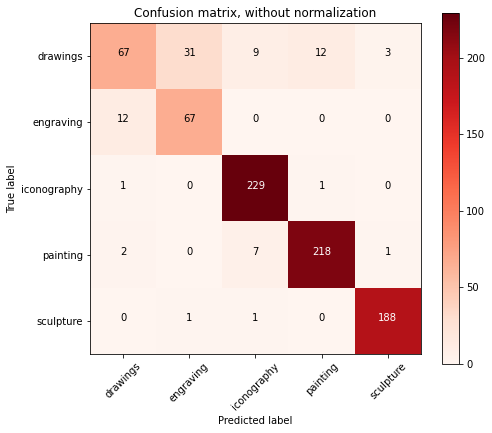

In [183]:
np.set_printoptions(precision=2)

fig1 = plt.figure(figsize=(7,6))
plot_confusion_matrix(conf_mat, classes=classes, title='Confusion matrix, without normalization')

In [4]:
from tensorflow.keras.applications.nasnet import NASNetLarge

base_model= NASNetLarge(include_top=False, weights='imagenet')
base_model.summary()
x=base_model.output
print("Output Shape of the model = {}".format(x))
x=GlobalAveragePooling2D()(x)


x=Dense(1024,activation='relu')(x)
x =Dropout(0.5)(x)

predictions=Dense(5,activation='softmax')(x)

model=Model(inputs=base_model.input,outputs=predictions)


343621632/343610240 [==============================] - 9s 0us/step
Model: "NASNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 331, 331, 3) 0                                            
__________________________________________________________________________________________________
stem_conv1 (Conv2D)             (None, 165, 165, 96) 2592        input_2[0][0]                    
__________________________________________________________________________________________________
stem_bn1 (BatchNormalization)   (None, 165, 165, 96) 384         stem_conv1[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, 165, 165, 96) 0           stem_bn1[0][0]                   
__________________________

__________________________________________________________________________________________________
separable_conv_2_normal_right1_ (None, 21, 21, 336)  115920      activation_357[0][0]             
__________________________________________________________________________________________________
separable_conv_2_normal_left2_1 (None, 21, 21, 336)  121296      activation_359[0][0]             
__________________________________________________________________________________________________
separable_conv_2_normal_right2_ (None, 21, 21, 336)  115920      activation_361[0][0]             
__________________________________________________________________________________________________
separable_conv_2_normal_left5_1 (None, 21, 21, 336)  115920      activation_363[0][0]             
__________________________________________________________________________________________________
separable_conv_2_bn_normal_left (None, 21, 21, 336)  1344        separable_conv_2_normal_left1_12[
__________

In [7]:
#callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')

best_model_path = 'C:\\Users\\namra\\OneDrive\\Desktop\\dataset\\NASNet_2.h5'
best_model = ModelCheckpoint( filepath= best_model_path, verbose = 1, save_weights_only= True)

for layer in base_model.layers:
    layer.trainable=False
    

model.compile(optimizer='Adam', 
              loss='categorical_crossentropy', 
             metrics =['accuracy',tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])


history = model.fit(train_generator,
                              epochs=10,
                              verbose=1, 
                              validation_data=validation_generator,
                              callbacks = [best_model]
                              )
model.save('C:\\Users\\namra\\OneDrive\\Desktop\\dataset\\model_nasnet_2.h5')


Epoch 1/10
240/240 [==============================] - ETA: 0s - loss: 0.5063 - accuracy: 0.8274 - recall_2: 0.8038 - precision_2: 0.8504

InvalidArgumentError:  logits and labels must be broadcastable: logits_size=[32,5] labels_size=[32,6]
	 [[node categorical_crossentropy/softmax_cross_entropy_with_logits (defined at <ipython-input-7-2d9febc5a1d3>:15) ]] [Op:__inference_test_function_95166]

Function call stack:
test_function
